In [67]:
from rossby_waves import *
from math import floor
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel, vel_autocor, traj2
from matplotlib.animation import FuncAnimation, PillowWriter

In [68]:
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
ro.add_grid_waves()
ro.remove_wave(0)
x = grid(100)
t = np.linspace(0, 10e11,401)
t2 = np.linspace(0, 10e11,400)


In [69]:
#Velocity Autocorrelation function
def f(data1,data2, i,t,e):
    initial = np.vstack((np.array(xcoords)[:,0],np.array(ycoords)[:,0])).T
    final = np.vstack((np.array(xcoords)[:,i],np.array(ycoords)[:,i])).T
    u = vel(ro, initial, 0, eps=e)
    v = vel(ro, final, t, eps=e)
    a = 0
    b = 0
    for i in range(np.shape(v)[0]):
        a += (np.dot(u[i], v[i]))
        b += np.dot(v[i], v[i])
    return (a / b) * np.shape(v)[0]


Divergence Free Flow (eps = 0)

In [70]:
xcoords, ycoords = trajectory(ro,x,0,10e11, 2.5e9, eps=0)
arr = []
for i in range(1,len(xcoords[1])):
    arr.append(f(xcoords,ycoords,i,t[i],0))


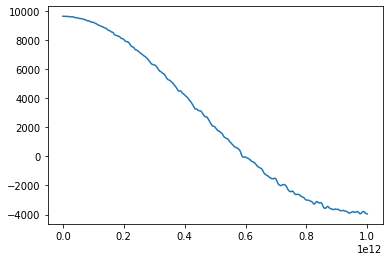

In [ ]:
plt.plot(t2,arr)

Purely Divergent Flow (eps = 1)

In [ ]:
xcoords, ycoords = trajectory(ro,x,0,10e11, 2.5e9, eps=1)
arr = []
for i in range(1,len(xcoords[1])):
    arr.append(f(xcoords,ycoords,i,t[i],0))


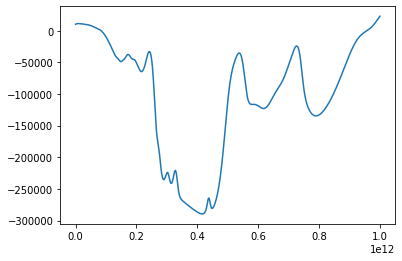

In [ ]:
plt.plot(t2,arr)

Weak Divergence (eps=0.01)

In [ ]:
xcoords, ycoords = trajectory(ro,x,0,10e11, 2.5e9, eps=0.01)
arr = []
for i in range(1,len(xcoords[1])):
    arr.append(f(xcoords,ycoords,i,t[i],0))


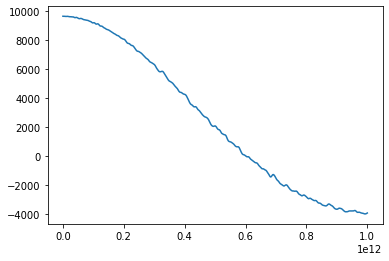

In [ ]:
plt.plot(t2,arr)

Extremely Weak Divergence (eps=0.001)

In [ ]:
xcoords, ycoords = trajectory(ro,x,0,10e11, 2.5e9, eps=0.001)
arr = []
for i in range(1,len(xcoords[1])):
    arr.append(f(xcoords,ycoords,i,t[i],0))


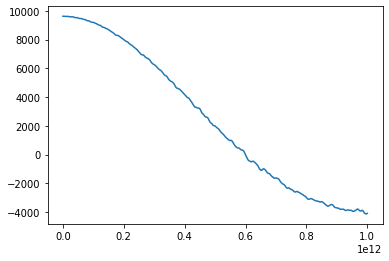

In [ ]:
plt.plot(t2,arr)